# 1

## I, II

Персонализированные рекомендации фильмов Кластеризация, Ассоциация улучшает пользовательский опыт при пользовании онлайн кинотеатрами и афишами
Анализ спроса Регрессия прогнозирует спрос на основе исторических данных учитывая все зависимости улучшая точность
Беспилотные автомобили Обучение с подкреплением позволяет автоматизировать управление транспортом 
Фильтрация спам писем на почте Классификация улучшает визуальное восприятие и пользовательский опыт
Прогнозирование цен Регрессия улучшает точность прогнозов

1 Прогноз цены на дом Регрессия 
2 Предсказать, вернёт ли клиент кредит классификация
3 Предсказать, когда пациенту принять лекарство	Регрессия 
4 Выбор лекарства для пациента	Классификация
5 Выбор сегмента клиентов для промо	Ассоциация, Кластеризация, Снижение размерности 
6 Распознавание дефектной продукции классификация
7 Размещение продукции на полке	Регрессия 
9 Сегментация покупателей	Кластеризация, Снижение размерности
10 Обнаружение аномалий в трафике	Классификация, кластеризация

## III

мультикласс выбирает один наиболее подходящий класс, а мультиметка не взаимоисключает остальные метки и может присвоить несколько

## IV

предсказание цены это регрессионная проблема, можно свести регрессию к классификации разбив непрерывную целевую переменную на группы

# 2

In [3]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import scipy
import statsmodels
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [4]:
df = pd.read_json('../datasets/train.json')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


shape: 49352 rows and 15 columns

In [5]:
print(df.columns)

Index(['bathrooms', 'bedrooms', 'building_id', 'created', 'description',
       'display_address', 'features', 'latitude', 'listing_id', 'longitude',
       'manager_id', 'photos', 'price', 'street_address', 'interest_level'],
      dtype='object')


Price is a target
no empty columns

In [6]:
df.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


In [7]:
df

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124000,1.0,3,92bbbf38baadfde0576fc496bd41749c,2016-04-05 03:58:33,There is 700 square feet of recently renovated...,W 171 Street,"[Elevator, Dishwasher, Hardwood Floors]",40.8433,6824800,-73.9396,a61e21da3ba18c7a3d54cfdcc247e1f8,[https://photos.renthop.com/2/6824800_0682be16...,2800,620 W 171 Street,low
124002,1.0,2,5565db9b7cba3603834c4aa6f2950960,2016-04-02 02:25:31,"2 bedroom apartment with updated kitchen, rece...",Broadway,"[Common Outdoor Space, Cats Allowed, Dogs Allo...",40.8198,6813268,-73.9578,8f90e5e10e8a2d7cf997f016d89230eb,[https://photos.renthop.com/2/6813268_1e6fcc32...,2395,3333 Broadway,medium
124004,1.0,1,67997a128056ee1ed7d046bbb856e3c7,2016-04-26 05:42:03,No Brokers Fee * Never Lived 1 Bedroom 1 Bathr...,210 Brighton 15th St,"[Dining Room, Elevator, Pre-War, Laundry in Bu...",40.5765,6927093,-73.9554,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/6927093_93a52104...,1850,210 Brighton 15th St,medium
124008,1.0,2,3c0574a740154806c18bdf1fddd3d966,2016-04-19 02:47:33,Wonderful Bright Chelsea 2 Bedroom apartment o...,West 21st Street,"[Pre-War, Laundry in Unit, Dishwasher, No Fee,...",40.7448,6892816,-74.0017,c3cd45f4381ac371507090e9ffabea80,[https://photos.renthop.com/2/6892816_1a8d087a...,4195,350 West 21st Street,medium


In [8]:
df1= df[['bathrooms','bedrooms','interest_level','price']].copy()

# 3

[]

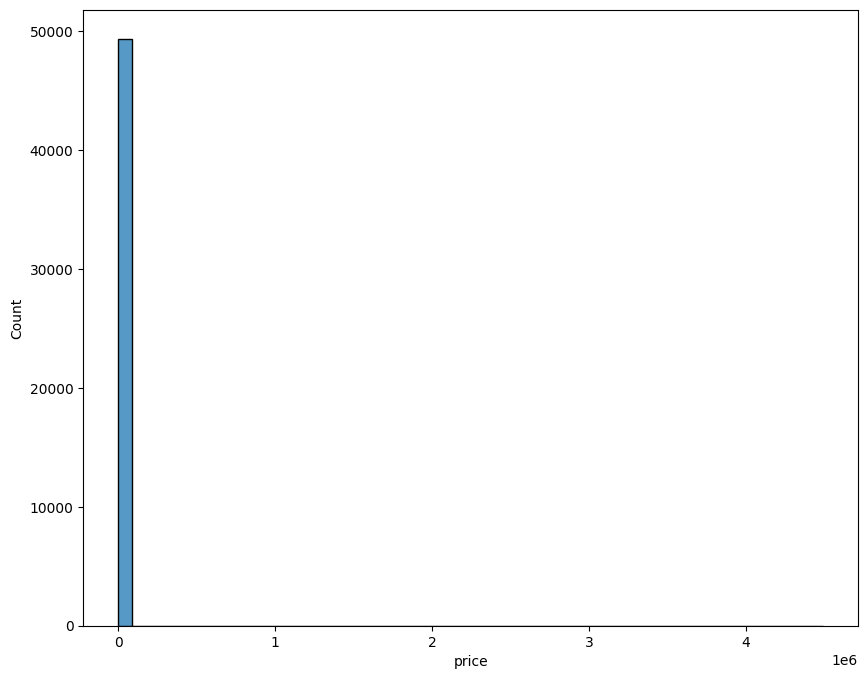

In [9]:
plt.figure(figsize=(10,8))
sns.histplot(df1['price'], bins=50)
plt.plot()

[]

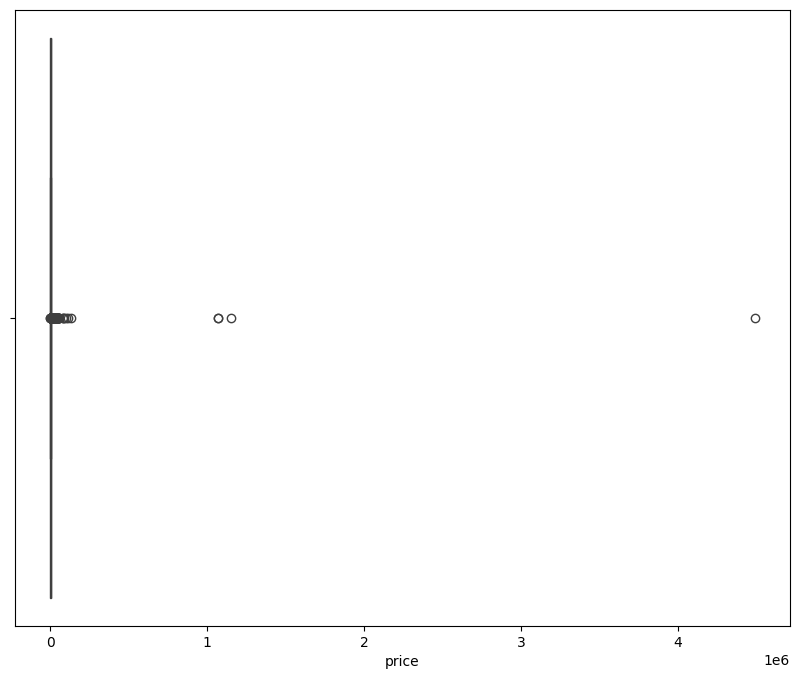

In [10]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df1['price'], flierprops={'marker': 'o', })
plt.plot()

In [11]:
low = df1['price'].quantile(0.01)
up = df1['price'].quantile(0.99)
dfc = df1[(df1['price'] > low) & (df1['price'] < up)].copy()

In [12]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48343 entries, 4 to 124009
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bathrooms       48343 non-null  float64
 1   bedrooms        48343 non-null  int64  
 2   interest_level  48343 non-null  object 
 3   price           48343 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 1.8+ MB


[]

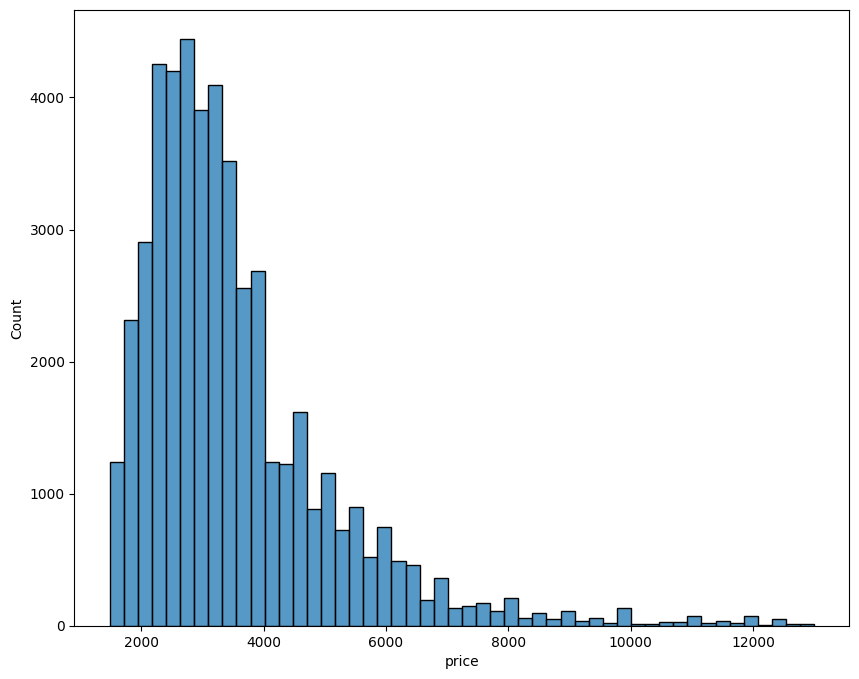

In [13]:
plt.figure(figsize=(10,8))
sns.histplot(dfc['price'], bins=50)
plt.plot()

## IV

Interesct level is object type

In [14]:
dfc['interest_level'].value_counts()

interest_level
low       33672
medium    11114
high       3557
Name: count, dtype: int64

In [15]:
dfc.loc[:,'interest_level'] = dfc['interest_level'].replace({'low':0,'medium':1,'high':2})


/tmp/ipykernel_8636/4243167379.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfc.loc[:,'interest_level'] = dfc['interest_level'].replace({'low':0,'medium':1,'high':2})


In [16]:
dfc

,bathrooms,bedrooms,interest_level,price
4,1.0,1,1,2400
6,1.0,2,0,3800
9,1.0,2,1,3495
10,1.5,3,1,3000
15,1.0,0,0,2795
...,...,...,...,...
124000,1.0,3,0,2800
124002,1.0,2,1,2395
124004,1.0,1,1,1850
124008,1.0,2,1,4195


[]

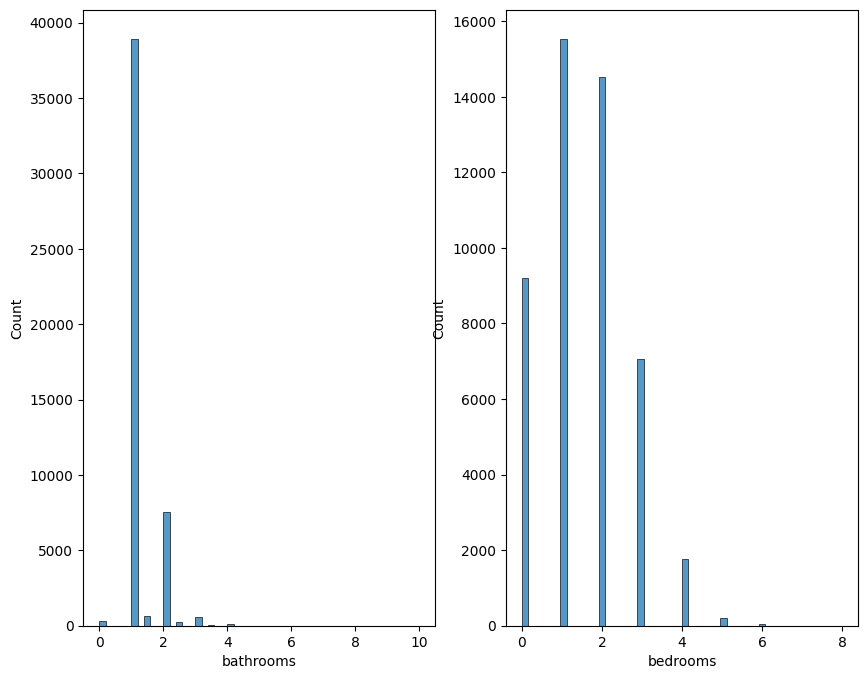

In [17]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.histplot(dfc['bathrooms'], bins=50)
plt.subplot(1,2,2)
sns.histplot(dfc['bedrooms'], bins=50)
plt.plot()

no outliers

## V

[]

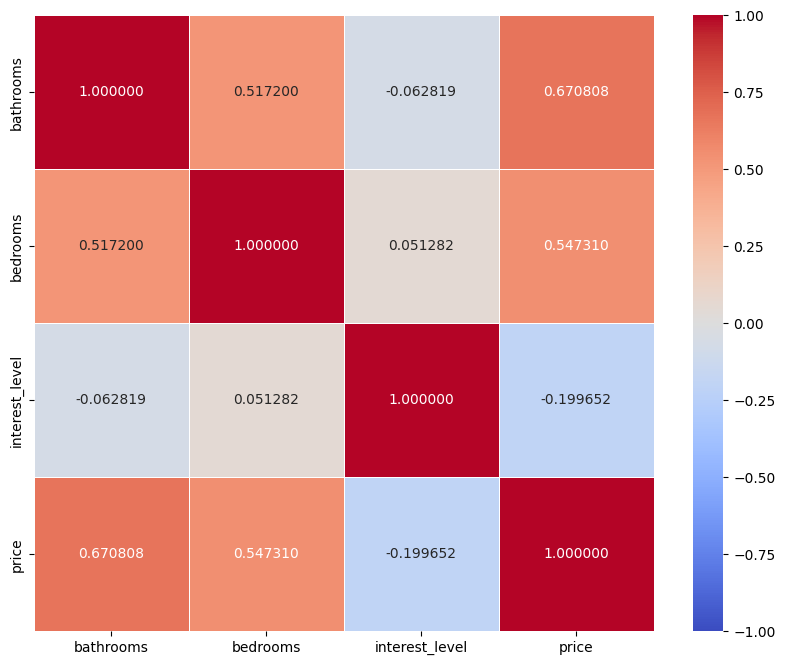

In [18]:
matrix = dfc.corr(method='pearson')
plt.figure(figsize=(10,8))
sns.heatmap(matrix, annot=True,  fmt=".6f", cmap='coolwarm', center=0, vmin=-1, vmax=1, linewidths=0.5)
plt.plot()

[]

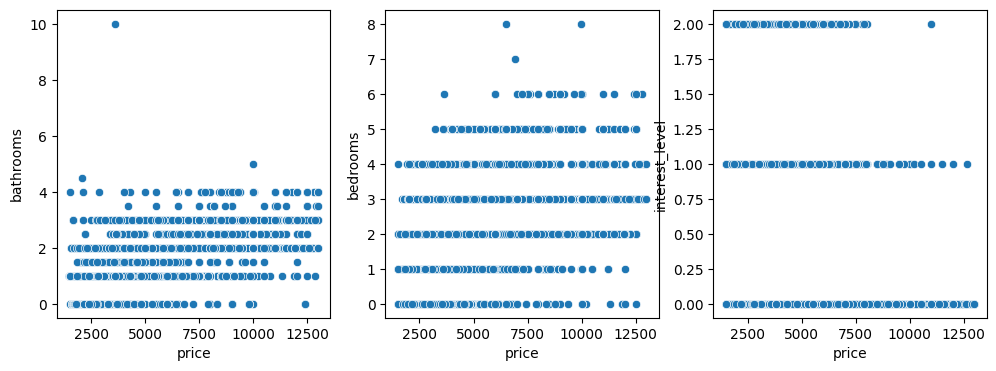

In [19]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.scatterplot(x=dfc['price'], y=dfc['bathrooms'])
plt.subplot(1,3,2)
sns.scatterplot(x=dfc['price'], y=dfc['bedrooms'])
plt.subplot(1,3,3)
sns.scatterplot(x=dfc['price'], y=dfc['interest_level'])
plt.plot()

## 4

In [20]:
dfc['bathrooms_squared'] = dfc['bathrooms'] ** 2
dfc['bedrooms_squared'] = dfc['bedrooms'] ** 2
dfc['interest_level_squared'] = dfc['interest_level'] ** 2

[]

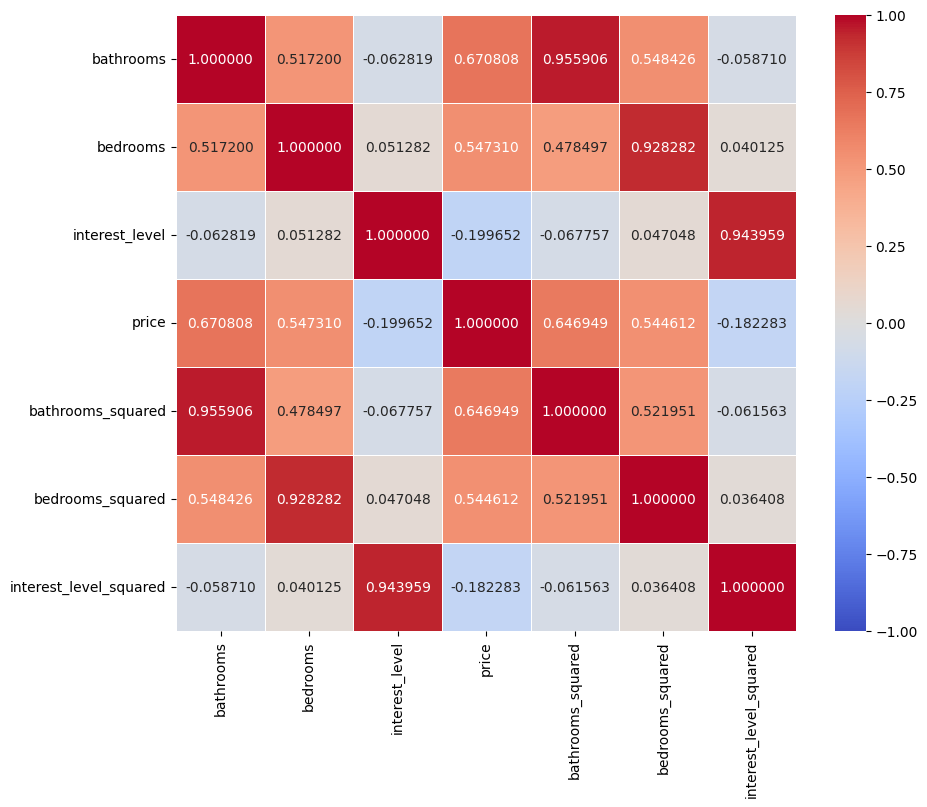

In [21]:
smatrix = dfc.corr(method='pearson')
plt.figure(figsize=(10,8))
sns.heatmap(smatrix, annot=True,  fmt=".6f", cmap='coolwarm', center=0, vmin=-1, vmax=1, linewidths=0.5)
plt.plot()

no better corr

In [22]:
dfc = dfc[['bathrooms','bedrooms','price']].copy()

In [23]:
dfc

,bathrooms,bedrooms,price
4,1.0,1,2400
6,1.0,2,3800
9,1.0,2,3495
10,1.5,3,3000
15,1.0,0,2795
...,...,...,...
124000,1.0,3,2800
124002,1.0,2,2395
124004,1.0,1,1850
124008,1.0,2,4195


## VI

In [24]:
dftst = pd.read_json('../datasets/test.json')
dftst.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74659 entries, 0 to 124010
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        74659 non-null  float64
 1   bedrooms         74659 non-null  int64  
 2   building_id      74659 non-null  object 
 3   created          74659 non-null  object 
 4   description      74659 non-null  object 
 5   display_address  74659 non-null  object 
 6   features         74659 non-null  object 
 7   latitude         74659 non-null  float64
 8   listing_id       74659 non-null  int64  
 9   longitude        74659 non-null  float64
 10  manager_id       74659 non-null  object 
 11  photos           74659 non-null  object 
 12  price            74659 non-null  int64  
 13  street_address   74659 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 8.5+ MB


In [25]:
dftst = dftst[['bathrooms','bedrooms','price']].copy()
dftst.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74659 entries, 0 to 124010
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bathrooms  74659 non-null  float64
 1   bedrooms   74659 non-null  int64  
 2   price      74659 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 2.3 MB


[]

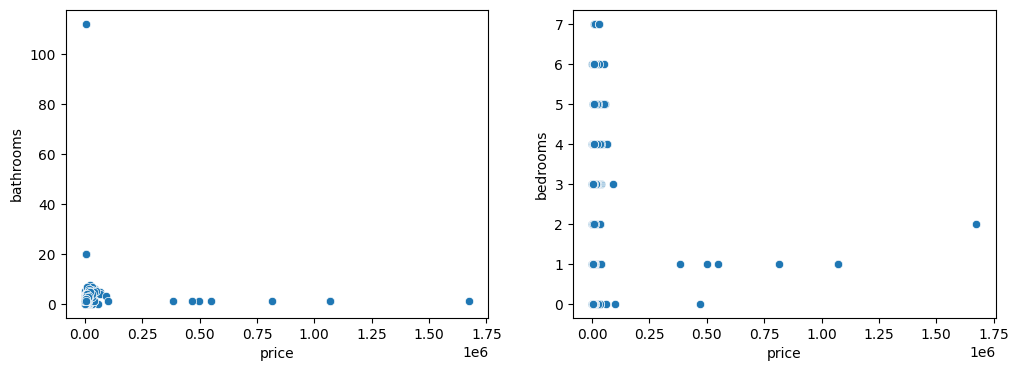

In [26]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.scatterplot(x=dftst['price'], y=dftst['bathrooms'])
plt.subplot(1,2,2)
sns.scatterplot(x=dftst['price'], y=dftst['bedrooms'])
plt.plot()

In [27]:
low = dftst['bathrooms'].quantile(0.01)
up = dftst['bathrooms'].quantile(0.99)
dftst = dftst[(dftst['bathrooms'] > low) & (dftst['bathrooms'] < up)]
low = dftst['price'].quantile(0.01)
up = dftst['price'].quantile(0.99)
dftst = dftst[(dftst['price'] > low) & (dftst['price'] < up)]

[]

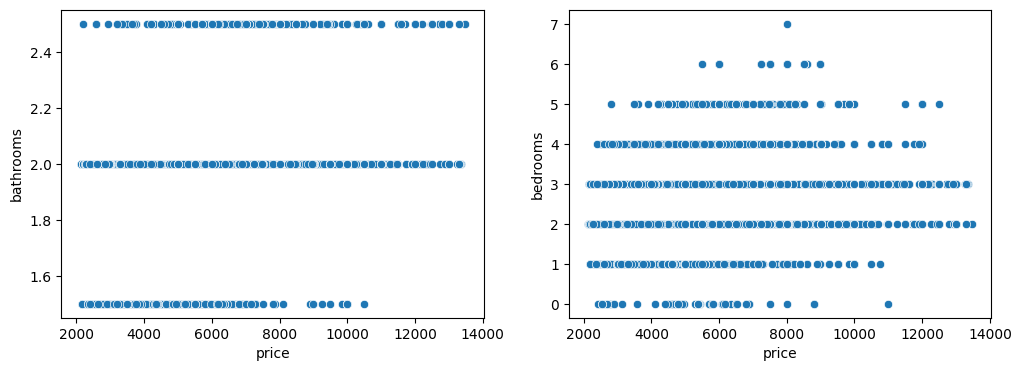

In [28]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.scatterplot(x=dftst['price'], y=dftst['bathrooms'])
plt.subplot(1,2,2)
sns.scatterplot(x=dftst['price'], y=dftst['bedrooms'])
plt.plot()

In [29]:
dftst.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12721 entries, 7 to 124007
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bathrooms  12721 non-null  float64
 1   bedrooms   12721 non-null  int64  
 2   price      12721 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 397.5 KB


In [30]:
X_train = dfc[['bathrooms','bedrooms']]
y_train = dfc['price']
X_test = dftst[['bathrooms','bedrooms']]
y_test = dftst['price']
poly = PolynomialFeatures(degree=10)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [31]:
X_train_poly

array([[1.0000e+00, 1.0000e+00, 1.0000e+00, ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [1.0000e+00, 1.0000e+00, 2.0000e+00, ..., 2.5600e+02, 5.1200e+02,
        1.0240e+03],
       [1.0000e+00, 1.0000e+00, 2.0000e+00, ..., 2.5600e+02, 5.1200e+02,
        1.0240e+03],
       ...,
       [1.0000e+00, 1.0000e+00, 1.0000e+00, ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [1.0000e+00, 1.0000e+00, 2.0000e+00, ..., 2.5600e+02, 5.1200e+02,
        1.0240e+03],
       [1.0000e+00, 1.0000e+00, 3.0000e+00, ..., 6.5610e+03, 1.9683e+04,
        5.9049e+04]], shape=(48343, 66))

# 5

## I

In [32]:
result_MAE = pd.DataFrame(columns=['model', 'train', 'test'])
result_RMSE = pd.DataFrame(columns=['model', 'train', 'test'])

## II

In [33]:
linreg = LinearRegression()
linreg.fit(X_train_poly,y_train)
dfc.loc[:, 'predicted_lin'] = linreg.predict(X_train_poly)
dftst.loc[:, 'predicted_lin'] = linreg.predict(X_test_poly)

In [34]:
train_mae = mean_absolute_error(dfc['price'], dfc['predicted_lin'])
test_mae = mean_absolute_error(dftst['price'], dftst['predicted_lin'])

train_rmse = np.sqrt(mean_squared_error(dfc['price'], dfc['predicted_lin']))
test_rmse = np.sqrt(mean_squared_error(dftst['price'], dftst['predicted_lin']))

In [35]:
result_MAE = pd.concat([
    result_MAE,pd.DataFrame({
    'model': ['linear_regression'],
    'train': [train_mae],
    'test': [test_mae]})
], ignore_index=True)
result_RMSE = pd.concat([
    result_RMSE,pd.DataFrame({
    'model': ['linear_regression'],
    'train': [train_rmse],
    'test': [test_rmse]})
], ignore_index=True)

/tmp/ipykernel_8636/2892103218.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_MAE = pd.concat([
/tmp/ipykernel_8636/2892103218.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_RMSE = pd.concat([


## III

In [36]:
dt = DecisionTreeClassifier(random_state=21)
dt.fit(X_train_poly,y_train)
dfc.loc[:, 'predicted_dt'] = dt.predict(X_train_poly)
dftst.loc[:, 'predicted_dt'] = dt.predict(X_test_poly)

In [37]:
train_mae = mean_absolute_error(dfc['price'], dfc['predicted_dt'])
test_mae = mean_absolute_error(dftst['price'], dftst['predicted_dt'])

train_rmse = np.sqrt(mean_squared_error(dfc['price'], dfc['predicted_dt']))
test_rmse = np.sqrt(mean_squared_error(dftst['price'], dftst['predicted_dt']))

In [38]:
result_MAE = pd.concat([
    result_MAE,pd.DataFrame({
    'model': ['decision_tree'],
    'train': [train_mae],
    'test': [test_mae]})
], ignore_index=True)
result_RMSE = pd.concat([
    result_RMSE,pd.DataFrame({
    'model': ['decision_tree'],
    'train': [train_rmse],
    'test': [test_rmse]})
], ignore_index=True)

## IV

In [39]:
mean = y_train.mean()
median = y_train.median()
dfc.loc[:, 'naive_mean'] = mean
dfc.loc[:, 'naive_median'] = median
dftst.loc[:, 'naive_mean'] = mean
dftst.loc[:, 'naive_median'] = median

mean

In [40]:
train_mae = mean_absolute_error(dfc['price'], dfc['naive_mean'])
test_mae = mean_absolute_error(dftst['price'], dftst['naive_mean'])

train_rmse = np.sqrt(mean_squared_error(dfc['price'], dfc['naive_mean']))
test_rmse = np.sqrt(mean_squared_error(dftst['price'], dftst['naive_mean']))

In [41]:
result_MAE = pd.concat([
    result_MAE,pd.DataFrame({
    'model': ['naive_mean'],
    'train': [train_mae],
    'test': [test_mae]})
], ignore_index=True)
result_RMSE = pd.concat([
    result_RMSE,pd.DataFrame({
    'model': ['naive_mean'],
    'train': [train_rmse],
    'test': [test_rmse]})
], ignore_index=True)

median

In [42]:
train_mae = mean_absolute_error(dfc['price'], dfc['naive_median'])
test_mae = mean_absolute_error(dftst['price'], dftst['naive_median'])

train_rmse = np.sqrt(mean_squared_error(dfc['price'], dfc['naive_median']))
test_rmse = np.sqrt(mean_squared_error(dftst['price'], dftst['naive_median']))

In [43]:
result_MAE = pd.concat([
    result_MAE,pd.DataFrame({
    'model': ['naive_median'],
    'train': [train_mae],
    'test': [test_mae]})
], ignore_index=True)
result_RMSE = pd.concat([
    result_RMSE,pd.DataFrame({
    'model': ['naive_median'],
    'train': [train_rmse],
    'test': [test_rmse]})
], ignore_index=True)

## V

In [44]:
print(result_MAE, '\n', result_RMSE)

               model        train         test
0  linear_regression   753.679394  1198.582498
1      decision_tree   788.088182  1233.484789
2         naive_mean  1134.361473  1985.582747
3       naive_median  1082.220859  2297.720698 
                model        train         test
0  linear_regression  1070.669027  1667.237612
1      decision_tree  1156.447476  1719.723606
2         naive_mean  1585.609099  2536.181813
3       naive_median  1631.719953  2829.254052
